# Описание проекта

Контекст
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.


# Описание данных


Данные для первой части


- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части


- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Изучение данных из файла

### Часть 1. Приоритизация гипотез.

Применить фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

Применить фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt
import numpy as np


pd.set_option('display.max_colwidth', -1)

<ipython-input-1-793b05d4a607>:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [2]:
hypothesis=pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv', sep=',')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
#Посчитаем ICE для гипотез, добавим полученные значения ICE к существующей таблице.
hypothesis['ICE']=round(hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts'],2)
hypothesis_ICE=hypothesis[['Hypothesis','ICE']].sort_values('ICE', ascending=False)
hypothesis_ICE

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее перспективные гипотезы по ICE: 8, 0,7,6,2

In [4]:
#Посчитаем RICE для гипотез, добавим полученные значения RICE к существующей таблице.
hypothesis['RICE']=round(hypothesis['Impact']*hypothesis['Confidence']*hypothesis['Reach']/hypothesis['Efforts'],2)
hypothesis_RICE=hypothesis[['Hypothesis','RICE']].sort_values('RICE', ascending=False)
hypothesis_RICE

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


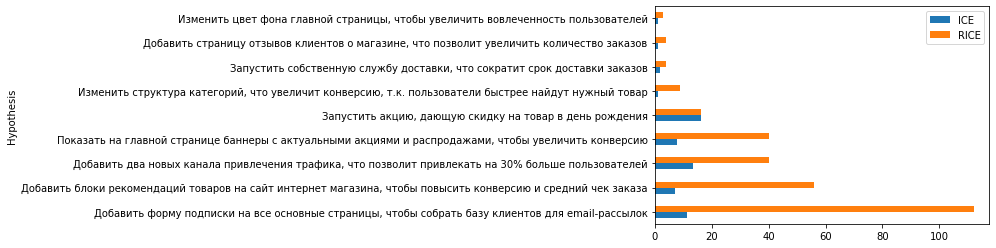

In [5]:
hypothesis_RICE_ICE=hypothesis_ICE.merge(hypothesis_RICE, how='outer', on='Hypothesis')
hypothesis_RICE_ICE.sort_values(['RICE','ICE'], ascending=[False,False]).set_index('Hypothesis')[['ICE','RICE']].plot(kind='barh');


Наиболее перспективные гипотезы по RICE: 7, 2,0,6,8. Примерно такие же гипотезы , что и при методе ICE, только первой гипотезой выступает 7- добавить форму подписки на все основные страницы. Так получилось, из-за того, что REACH у этой гипотезы самый высокий-10,т.е затронет данная гипотеза большое кол-во пользователей.

### Часть 2. Анализ A/B-теста

In [6]:
orders=pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv', sep=',')


In [7]:
def inspect(df):
    display(df.head()) 
    print ('Количество дубликатов -', df.duplicated().sum())
    numeric_columns=df.describe().columns
    display(df.describe())
    display()
    #orders.columns = [x.lower().replace(' ', '_') for x in df.columns.values]
    for column_name in df.columns:
        if column_name not in numeric_columns:
            if 'date' in column_name or 'dt' in column_name:
                df[column_name] = df[column_name].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
            else:
                display(df[column_name].value_counts())
                print(50*'*')
    df.info() 
    return df
orders = inspect(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Количество дубликатов - 0


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


B    640
A    557
Name: group, dtype: int64

**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 42.1+ KB


In [8]:
visitors=pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv', sep=',')


In [9]:
def inspect(df):
    display(df.head()) 
    print ('Количество дубликатов -', df.duplicated().sum())
    numeric_columns=df.describe().columns
    display(df.describe())
    display()
    for column_name in df.columns:
        if column_name not in numeric_columns:
            if 'date' in column_name or 'dt' in column_name:
                df[column_name] = df[column_name].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
            else:
                display(df[column_name].value_counts())
                print(50*'*')
    df.info()            
    
    return df
visitors = inspect(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Количество дубликатов - 0


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


A    31
B    31
Name: group, dtype: int64

**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.3+ KB


In [10]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.3+ KB


In [11]:
visitors.groupby('group')['visitors'].count()

group
A    31
B    31
Name: visitors, dtype: int64

In [12]:
orders.groupby('group')['visitorId'].count()

group
A    557
B    640
Name: visitorId, dtype: int64

In [13]:
orders.groupby(['visitorId', 'group']).size()

visitorId   group
5114589     B        1
6958315     B        1
8300375     A        1
            B        1
11685486    A        1
                    ..
4266935830  B        1
4278982564  A        1
4279090005  B        1
4281247801  B        1
4283872382  B        1
Length: 1089, dtype: int64

In [14]:
unique_user_A = orders[orders['group'] == 'A']['visitorId'].unique()
unique_user_B = orders[orders['group'] == 'B']['visitorId'].unique()

overlapping_users_count = 0 
overlapping_users = []

for i in unique_user_A:
    if i in unique_user_B:
        overlapping_users_count += 1
        overlapping_users.append(i)

In [15]:
overlapping_users_count

58

In [50]:
duplicated_users = orders.groupby('visitorId').agg({'group': ['nunique', 'unique']})
duplicated_users.columns = ['groups', 'group_names']
duplicated_users = duplicated_users.query('groups > 1')
display(len(duplicated_users))

58

In [ ]:
 Например, вот так:
#     
# `unique_user_A = orders[orders['group'] == 'A']['visitorId'].unique()`
# `unique_user_B = orders[orders['group'] == 'B']['visitorId'].unique()`
# 
# `overlapping_users_count = 0`
# `overlapping_users = []`
# 
# `for i in unique_user_A:
#     if i in unique_user_B:
#         overlapping_users_count += 1
#         overlapping_users.append(i)`
#         
# Еще можно с помощью `groupby()`
#     
# `duplicated_users = orders.groupby('visitorId').agg({'group': ['nunique', 'unique']})`
# `duplicated_users.columns = ['groups', 'group_names']`
# `duplicated_users = duplicated_users.query('groups > 1')`
# `display(len(duplicated_users))

## Исследовательский анализ данных

Проанализируем A/B-тест:
    
### Построим график кумулятивной выручки по группам. 

In [16]:
orders.head()


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [17]:
#создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 
datesGroups

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


In [18]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups \
    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])] \
    .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1) \
    .sort_values(by=['date','group'])
ordersAggregated

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


In [19]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина :
visitorsAggregated = datesGroups \
    .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])] \
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1) \
    .sort_values(by=['date','group'])
visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [20]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


### Построим графики кумулятивной выручки по группам A/B-тестирования:

In [21]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueA

,date,revenue,orders
0,2019-08-01,148579,24
2,2019-08-02,242401,44
4,2019-08-03,354874,68
6,2019-08-04,425699,84
8,2019-08-05,549917,109
10,2019-08-06,598401,127
12,2019-08-07,740818,145
14,2019-08-08,837097,161
16,2019-08-09,1025603,177
18,2019-08-10,1236098,193


In [22]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
cumulativeRevenueB

,date,revenue,orders
1,2019-08-01,101217,21
3,2019-08-02,266748,45
5,2019-08-03,380996,61
7,2019-08-04,489567,78
9,2019-08-05,581995,101
11,2019-08-06,824337,129
13,2019-08-07,1049671,153
15,2019-08-08,1270589,180
17,2019-08-09,1431401,205
19,2019-08-10,1539203,228


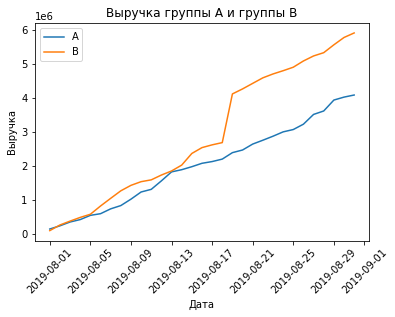

In [23]:
# Строим графики выручки группы А и группы B
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation=45)
plt.title('Выручка группы А и группы B')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend();

Наблюдается рост выручки группы В, скорее всего аномальные значения в данных.

### Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

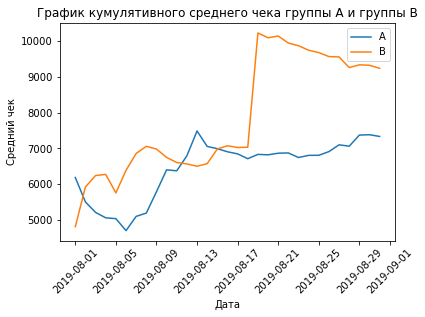

In [24]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=45)
plt.title('График кумулятивного среднего чека группы А и группы B')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend();

Средний чек становится равномерным ближе к концу теста для группы A, в то время для группы B произошел резкий скачок. Видимо попал  крупный заказ.

### Построим график относительного различия для среднего чека. Добавим горизонтальную ось методом axhline()

In [25]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA \
    .merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeRevenue

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101
5,2019-08-06,598401,127,824337,129
6,2019-08-07,740818,145,1049671,153
7,2019-08-08,837097,161,1270589,180
8,2019-08-09,1025603,177,1431401,205
9,2019-08-10,1236098,193,1539203,228


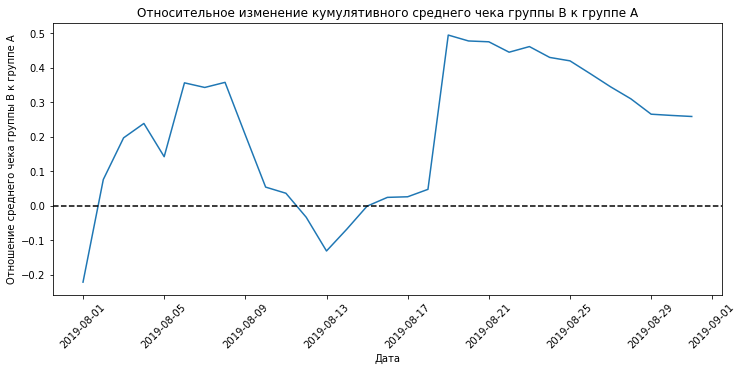

In [26]:
# cтроим отношение средних чеков
plt.figure(figsize=(12,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xticks(rotation=45)
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Отношение среднего чека группы B к группе A')
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

Как и ранее, видим, что резкие скачки между сегментами.Необходимо проверить на аномальные значения.

### Построим график кумулятивной конверсии по группам.

In [27]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A и по группе B
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

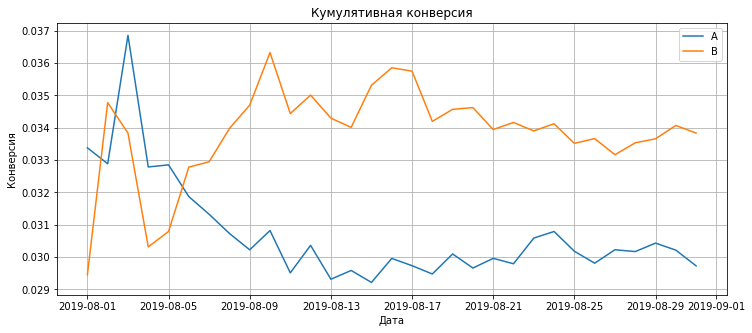

In [28]:
# строим графики
plt.figure(figsize=(12,5))
plt.grid()
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Кумулятивная конверсия')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.legend();

Конверсия по группе В выше, чем по группе А.

### Построим график относительного изменения кумулятивной конверсии группы B к группе A. 

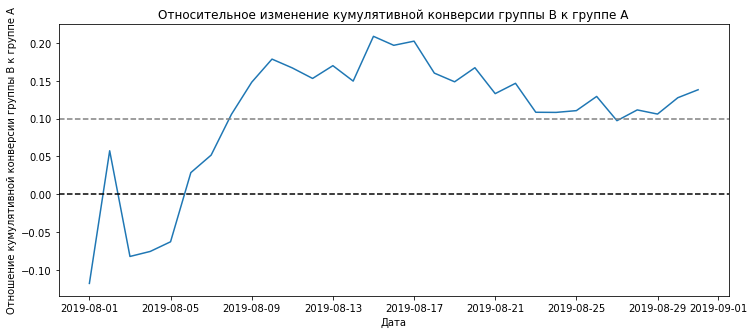

In [29]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.title('Относительное изменение кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Отношение кумулятивной конверсии группы B к группе A')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--');


Так же и ранее на графике, видимо, что конверсия в группе А было выше, но группа В выбиваетя в лидеры после недели начала теста.

### Построим точечный график количества заказов по пользователям.

In [30]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [31]:
#Подсчитаем количество заказов по пользователям :
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
    .sort_values(by='transactionId', ascending=False)
)
ordersByUsers.columns = ['userId', 'orders']
ordersByUsers

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
...,...,...
359,1484903144,1
360,1485964287,1
361,1494664757,1
362,1495112755,1


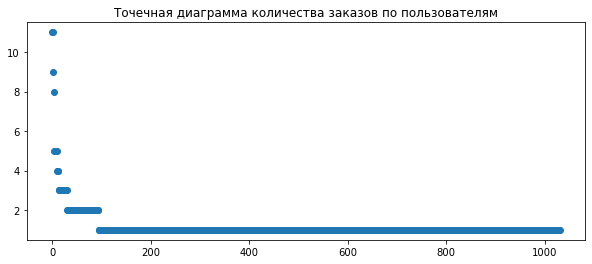

In [32]:
#построим точечную диаграмму:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(10,4))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечная диаграмма количества заказов по пользователям');

Судя по графику, большинство пользователей совершают не более 1 заказа.

In [33]:
# Посчитаем выборочные перцентили количества заказов на одного пользователя:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей оформляли больше чем 2 заказа. 1% пользователей заказывали более 4.
За нижнюю границу числа заказов выбрем  2 заказа на одного пользователя, и отсеим аномальных пользователей.

### Построим точечный график стоимостей заказов. 

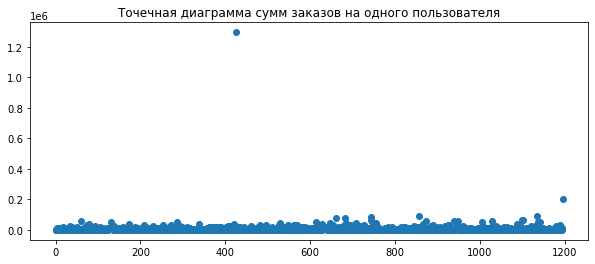

In [34]:
#построим точечную диаграмму стоимостей заказов:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10,4))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечная диаграмма сумм заказов на одного пользователя');

Судя по графику, имеютс яаномальные выбросы стоимости заказов на одного пользователя, от них необходимо избавится.

### Посчитаем 95-й и 99-й перцентили стоимости заказов.

In [35]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233 рубля.

### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

In [36]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [37]:

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId','revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [38]:
# Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

In [39]:
# Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Определим гипотезы:

Нулевая гипотеза - H₀: статистически значимых различий в конверсии между группами нет

Альтернативная гипотеза - H₁: статистически значимые различия в конверсии между группами есть

In [40]:
# проведем проверку критерием Манна-Уитни 
#и выведем относительный прирост конверсии группы B: 
alpha = 0.05
print('\nОтносительный прирост конверсии группы B по отношению к группе A: {:.3f}'.format(sampleB.mean()/sampleA.mean()-1))
results = stats.mannwhitneyu(sampleA, sampleB, alternative="two-sided")
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По неочищенным данным в конверсии групп A и B различия есть, нулевую гипотезу отвергаем')
else:
    print('По неочищенным данным в конверсии групп A и B различий нет,нулевую гипотезу не отвергаем')


Относительный прирост конверсии группы B по отношению к группе A: 0.138
P-value: 0.016792355056752608
По неочищенным данным в конверсии групп A и B различия есть, нулевую гипотезу отвергаем


По «сырым» данным различия есть в конверсии групп A и B. Нулевую гипотезу отвергаем, статистически значимые различия в конверсии между группами есть.

Относительный прирост группы В 14%.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Определим гипотезы:

Нулевая гипотеза - H₀: статистически значимых различий в среднем чеке  между группами нет

Альтернативная гипотеза - H₁: статистически значимые различия в среднем чеке  между группами есть

In [41]:
# проведем проверку критерием Манна-Уитни 
#и выведем относительный прирост среднего чека группы B:
alpha=0.05
print('Относительное изменение среднего чека в группе B по отношению группы A: {:.3f}'.format(
orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative="two-sided")
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По неочищенным данным в средних чеках групп A и B различия есть, нулевую гипотезу отвергаем')
else:
    print('По неочищенным данным в средних чеках групп A и B различий нет,нулевую гипотезу не отвергаем')

Относительное изменение среднего чека в группе B по отношению группы A: 0.259
P-value: 0.7292909855432458
По неочищенным данным в средних чеках групп A и B различий нет,нулевую гипотезу не отвергаем


P-value значительно больше 0.05. Нулевую гипотезу не отвергаем, различий по среднему чеку нет. Хотя, средний чек группы B значительно выше среднего чека группы A на 26%.

### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.

 Вспомним , сто 95-й и 99-й перцентили средних чеков равны 28000 , 58233.2 рублям. 
 
 95-й и 99-й перцентили количества заказов на одного пользователя равны 2, 4 заказа на пользователя соответственно.

Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 30 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 3 — usersWithManyOrders и пользователей, совершивших заказы дороже 30 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.

In [42]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head())
print('Кол-во аномальных пользователей: {}'.format(len(abnormalUsers)))

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
dtype: int64
Кол-во аномальных пользователей: 57


In [43]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Определим гипотезы:

Нулевая гипотеза - H₀: статистически значимых различий по очищенным данным в конверсии между группами нет

Альтернативная гипотеза - H₁: статистически значимые различия по очищенным данным в конверсии между группами есть

In [44]:
#Применим статистический критерий Манна-Уитни к полученным выборкам:
alpha=0.05
print('\nОтносительный прирост конверсии группы B по отношению к группе A по ощищенным данным: {:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))
results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative="two-sided")
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По очищенным данным в конверсии групп A и B различия есть, нулевую гипотезу отвергаем')
else:
    print('По очищенным данным  в конверсии групп A и B различий нет,нулевую гипотезу не отвергаем')


Относительный прирост конверсии группы B по отношению к группе A по ощищенным данным: 0.148
P-value: 0.018317500894249026
По очищенным данным в конверсии групп A и B различия есть, нулевую гипотезу отвергаем


Результаты теста практически не изменились.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

Определим гипотезы:

Нулевая гипотеза - H₀: статистически значимых различий по очищенным данным в  среднем чеке между группами нет

Альтернативная гипотеза - H₁: статистически значимые различия по очищенным данным в  среднем чеке  между группами есть

In [45]:
#Применим статистический критерий Манна-Уитни к полученным выборкам:
alpha=0.05
print('Относительное изменение среднего чека в группе B по отношению группы A по ощищенным данным: {:.3f}'.format(
orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()\
/orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()-1))
       
       
results = stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
                             orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], alternative="two-sided")
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По очищенным данным в средних чеках  групп A и B различия есть, нулевую гипотезу отвергаем')
else:
    print('По очищенным данным в средних чеках  A и B различий нет,нулевую гипотезу не отвергаем')

Относительное изменение среднего чека в группе B по отношению группы A по ощищенным данным: -0.020
P-value: 0.9583231483662625
По очищенным данным в средних чеках  A и B различий нет,нулевую гипотезу не отвергаем


P-value увеличился, но и разница между сегментами сократилась с 14% до -2%. Но по-прежнему нулевую гипротезу отвергаем, различий между группами нет.

In [46]:
from scipy.stats import shapiro
shapiro(sampleBFiltered)

C:\Users\inzira\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.1537073850631714, pvalue=0.0)

### Принятие решений

- Статистически значимые различия есть по конверсии между группами  по «сырым» и по данным после фильтрации аномалий;Относительный прирост группы В 14%.
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий; Разница между сегментами сократилась с 14% до -2%.

А/В тестирование можно остановить и засчитать группу В успешнее чем группа А.